<a href="https://colab.research.google.com/github/Rukaya-lab/Smart-Reply-suggest/blob/main/Smart_Reply_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apache_beam
!pip install 'scikit_learn~=0.23.0'  # For gaussian_random_matrix.
!pip install annoy

In [ ]:
import pickle
import numpy as np
from matplotlib.pyplot import figure
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
with open("/content/target_texts.pickle", 'rb') as handle:
    target_texts = pickle.load(handle)

len(target_texts)

21921

In [ ]:
#read txt file
#target_similarity_matrix = open("/content/target_similarity_matrix.txt", 'rb')
#target_similarity_matrix.to_csv('target_similarity_matrix_float.csv',
                  #index = None,  float_format='%.6f')

In [ ]:
target_similarity_matrix = pd.read_csv("/content/target_similarity_matrix.txt", header=None)
target_similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,21911,21912,21913,21914,21915,21916,21917,21918,21919,21920
0,[0.0,0.614492,0.314034,0.657649,1.294752,1.363622,0.934240,1.383126,1.292897,0.663531,...,1.409415,1.394175,1.390106,1.352876,0.688659,1.354635,1.401771,0.656599,1.306832,0.9548288583755493]
1,[0.6144917011260986,0.000000,0.582974,0.795361,1.285196,1.340297,0.817632,1.349995,1.293563,0.795912,...,1.397526,1.373771,1.361985,0.918679,0.808410,1.343612,1.391771,0.757869,1.276496,0.973863959312439]
2,[0.31403425335884094,0.582974,0.000000,0.882692,1.288350,1.333547,0.880123,1.362215,1.257932,0.884482,...,1.391558,1.365206,1.355224,1.310359,0.877051,1.333727,1.373667,0.875397,1.231963,0.6757979393005371]
3,[0.6576491594314575,0.795361,0.882692,0.000000,1.284484,1.399586,1.096128,1.410178,1.337039,0.073483,...,1.412708,1.394495,1.409258,1.400703,0.305147,1.352548,1.408295,0.537064,1.407276,1.3932366371154785]
4,[1.2947521209716797,1.285196,1.288350,1.284484,0.000000,1.318410,1.121317,1.295910,0.334620,1.264577,...,0.220049,0.667847,1.245640,1.286793,1.255484,1.269192,1.316742,1.036239,1.273362,1.3419913053512573]


In [ ]:
target_similarity_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Columns: 21921 entries, 0 to 21920
dtypes: float64(21919), object(2)
memory usage: 38.0+ MB


In [ ]:
'''
first_column = target_similarity_matrix[0].astype(str).apply(lambda x: float(x.replace("[", "")))
last_column = target_similarity_matrix[21920].astype(str).apply(lambda x: float(x.replace("]", "")))

target_similarity_matrix[0] = first_column
target_similarity_matrix[21920] = last_column

target_similarity_matrix.head()
'''

,0,1,2,3,4,5,6,7,8,9,...,21911,21912,21913,21914,21915,21916,21917,21918,21919,21920
0,0.000000,0.614492,0.314034,0.657649,1.294752,1.363622,0.934240,1.383126,1.292897,0.663531,...,1.409415,1.394175,1.390106,1.352876,0.688659,1.354635,1.401771,0.656599,1.306832,0.954829
1,0.614492,0.000000,0.582974,0.795361,1.285196,1.340297,0.817632,1.349995,1.293563,0.795912,...,1.397526,1.373771,1.361985,0.918679,0.808410,1.343612,1.391771,0.757869,1.276496,0.973864
2,0.314034,0.582974,0.000000,0.882692,1.288350,1.333547,0.880123,1.362215,1.257932,0.884482,...,1.391558,1.365206,1.355224,1.310359,0.877051,1.333727,1.373667,0.875397,1.231963,0.675798
3,0.657649,0.795361,0.882692,0.000000,1.284484,1.399586,1.096128,1.410178,1.337039,0.073483,...,1.412708,1.394495,1.409258,1.400703,0.305147,1.352548,1.408295,0.537064,1.407276,1.393237
4,1.294752,1.285196,1.288350,1.284484,0.000000,1.318410,1.121317,1.295910,0.334620,1.264577,...,0.220049,0.667847,1.245640,1.286793,1.255484,1.269192,1.316742,1.036239,1.273362,1.341991


In [ ]:
#target_similarity_matrix.to_csv('target_similarity_matrix_float.csv', index = None)

In [ ]:
target_similarity_matrix = pd.read_csv("/content/target_similarity_matrix_float.csv")
target_similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,21911,21912,21913,21914,21915,21916,21917,21918,21919,21920
0,0.000000,0.614492,0.314034,0.657649,1.294752,1.363622,0.934240,1.383126,1.292897,0.663531,...,1.409415,1.394175,1.390106,1.352876,0.688659,1.354635,1.401771,0.656599,1.306832,0.954829
1,0.614492,0.000000,0.582974,0.795361,1.285196,1.340297,0.817632,1.349995,1.293563,0.795912,...,1.397526,1.373771,1.361985,0.918679,0.808410,1.343612,1.391771,0.757869,1.276496,0.973864
2,0.314034,0.582974,0.000000,0.882692,1.288350,1.333547,0.880123,1.362215,1.257932,0.884482,...,1.391558,1.365206,1.355224,1.310359,0.877051,1.333727,1.373667,0.875397,1.231963,0.675798
3,0.657649,0.795361,0.882692,0.000000,1.284484,1.399586,1.096128,1.410178,1.337039,0.073483,...,1.412708,1.394495,1.409258,1.400703,0.305147,1.352548,1.408295,0.537064,1.407276,1.393237
4,1.294752,1.285196,1.288350,1.284484,0.000000,1.318410,1.121317,1.295910,0.334620,1.264577,...,0.220049,0.667847,1.245640,1.286793,1.255484,1.269192,1.316742,1.036239,1.273362,1.341991


In [ ]:
target_similarity_matrix.shape

(34, 21921)

In [ ]:
target_similarity_matrix.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
21916    1
21917    1
21918    1
21919    1
21920    1
Length: 21921, dtype: int64

In [ ]:
target_similarity_matrix= target_similarity_matrix.fillna(target_similarity_matrix.mean())

In [ ]:

# finding 10th neighbour distance to sentence 1
target_similarity_matrix.iloc[1].nsmallest(10).iloc[10-1]

0.1512033939361572

In [ ]:
# extending logic to all rows
def sort_and_select_10_neigh_dist(row):
    return row.nsmallest(10).iloc[10-1]

neighbor_10_dist = target_similarity_matrix.apply(sort_and_select_10_neigh_dist, axis = 0) #0 for rows, 1 for column

In [ ]:
neighbor_10_dist.describe()

count    21921.000000
mean         0.902111
std          0.248429
min          0.384418
25%          0.636463
50%          0.938300
75%          1.120509
max          1.409463
dtype: float64

In [ ]:

for x in list(target_similarity_matrix.nsmallest(10, 1).index.astype(int)):
    print(target_texts[x], " - Similarity Score :", target_similarity_matrix[x][1])

In [ ]:
neighbor_10_dist

0        0.657481
1        0.728319
2        0.879909
3        0.563165
4        1.121317
           ...   
21916    1.246727
21917    1.284163
21918    0.656599
21919    1.201209
21920    1.239375
Length: 21921, dtype: float64

In [ ]:
# using 40th percentile value as appropriate distance for 10th neighbour
eps_10 = neighbor_10_dist.quantile(0.99)
print(eps_10)

1.3376063346862792


In [ ]:
eps_nums = list()
eps_num_clusters = list()
eps_num_noise = list()
trial_eps = np.linspace(0, 0.1, num=50)

for eps_num in trial_eps:

    if eps_num > 0:

        print("Taking EPS as", eps_num)
        # Compute DBSCAN
        db = DBSCAN(eps=eps_num, min_samples=2, metric="euclidean", n_jobs=4).fit(target_similarity_matrix.T)

        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        eps_nums.append(eps_num)
        eps_num_clusters.append(n_clusters_)
        eps_num_noise.append(n_noise_)

        print('Estimated number of clusters: %d' % n_clusters_)
        print('Estimated number of noise points: %d' % n_noise_)
        print("-----------")

        if n_clusters_ == 1:
            print("Stopping..")
            # least number of clusters
            break

Taking EPS as 0.0020408163265306124
Estimated number of clusters: 770
Estimated number of noise points: 18376
-----------
Taking EPS as 0.004081632653061225
Estimated number of clusters: 791
Estimated number of noise points: 18228
-----------
Taking EPS as 0.006122448979591837
Estimated number of clusters: 811
Estimated number of noise points: 18087
-----------
Taking EPS as 0.00816326530612245
Estimated number of clusters: 827
Estimated number of noise points: 17949
-----------
Taking EPS as 0.010204081632653062
Estimated number of clusters: 869
Estimated number of noise points: 17783
-----------
Taking EPS as 0.012244897959183675
Estimated number of clusters: 895
Estimated number of noise points: 17594
-----------
Taking EPS as 0.014285714285714287
Estimated number of clusters: 924
Estimated number of noise points: 17378
-----------
Taking EPS as 0.0163265306122449
Estimated number of clusters: 931
Estimated number of noise points: 17209
-----------
Taking EPS as 0.018367346938775512

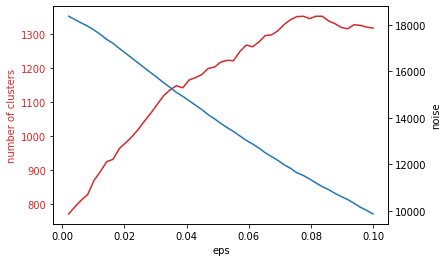

In [ ]:
#figure(num=None, figsize=(15, 6), dpi=80)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('eps')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(eps_nums, eps_num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

ax2.plot(eps_nums, eps_num_noise)
ax2.set_ylabel('noise')
plt.show()

In [ ]:

eps_num = 0.02
print("Taking EPS as", eps_num)
# Compute DBSCAN
#X= np.array(target_similarity_matrix)
db = DBSCAN(eps=eps_num, min_samples=3, n_jobs=4).fit(target_similarity_matrix.T)
print(target_similarity_matrix.shape)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Taking EPS as 0.02
(34, 21921)
Estimated number of clusters: 426
Estimated number of noise points: 17918


In [ ]:
labels

array([-1,  0,  1, ..., -1,  0,  0])

In [ ]:
for unique_label in set(labels):

    class_member_mask = (labels == unique_label)
    print("In cluster", unique_label, "found", Counter(class_member_mask)[True], "points")
    print("Samples")
    print(np.array(target_texts)[class_member_mask])
    print("-------------------------------------")
    #print(Counter(class_member_mask).keys()) # equals to list(set(words))
    #Counter(words).values() # counts the elements' frequency

In cluster 0 found 976 points
Samples
['nice do you like shakespeare' 'bye' 'yeah do you like shakespeare'
 'thanks' 'yeah do you have a pet' 'you too' 'bye' 'bye'
 'it really would1' 'thats pitiful' 'yes i love my roku'
 'nice do you like soundtracks' 'bye' 'yeah he definitely is sensitive'
 'really like a shoe' 'do you like tom cruise' 'i think its them rattlers'
 'what happened' 'stripes' 'you too' 'thanks'
 'nice did you know he was in degrassi' 'you too'
 'have you watched bumblebee' 'have you heard of transformers' 'bye'
 'yeah definitely' 'no do they have wings' 'thanks'
 'yes when i was in clg' 'you too' 'how is your hearing' 'you too'
 'i believe the astros' 'i know' 'was it something like solitaire'
 'you too' 'you too' 'bye' 'thanks' 'thanks' 'i like adidas'
 'whats a tagger' 'thanks' 'do you like snakes' 'goodbye' 'that'
 'that is wild' 'you too' 'sure' 'yes for airships' 'you too' 'absolutely'
 'like when they migrate' 'im not sure what about eels' 'no' 'thanks'
 'thanks' 

In [ ]:
with open('target_dbscan_002.pickle', 'wb') as handle:
    pickle.dump(db, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

eps_num = 0.06
print("Taking EPS as", eps_num)
# Compute DBSCAN
#X= np.array(target_similarity_matrix)
db = DBSCAN(eps=eps_num, min_samples=2, n_jobs=4).fit(target_similarity_matrix.T)
print(target_similarity_matrix.shape)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Taking EPS as 0.06
(34, 21921)
Estimated number of clusters: 1271
Estimated number of noise points: 12966


In [ ]:
for unique_label in set(labels):

    class_member_mask = (labels == unique_label)
    print("In cluster", unique_label, "found", Counter(class_member_mask)[True], "points")
    print("Samples")
    print(np.array(target_texts)[class_member_mask])
    print("-------------------------------------")

Streaming output truncated to the last 5000 lines.
-------------------------------------
In cluster 353 found 2 points
Samples
['yeah same here have a good one' 'yeah same here have a good one']
-------------------------------------
In cluster 354 found 4 points
Samples
['have a great day too' 'you have a great day too'
 'you have a great day too' 'have a great day too']
-------------------------------------
In cluster 355 found 2 points
Samples
['good luck getting there' 'i believe it is a tunnel construction company']
-------------------------------------
In cluster 356 found 4 points
Samples
['i do like rock music do you' 'i love jack black do you'
 'i wonder if texting counts as use' 'thats believable babies love music']
-------------------------------------
In cluster 357 found 17 points
Samples
['yes crazy rich asians was good'
 'yes there are about 20 quintollion out there' 'what team is that'
 'i did not know that which group was that'
 'why is that i have always wondered about

In [ ]:
with open('target_dbscan_006.pickle', 'wb') as handle:
    pickle.dump(db, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

eps_num = 0.1
print("Taking EPS as", eps_num)
# Compute DBSCAN
#X= np.array(target_similarity_matrix)
db = DBSCAN(eps=eps_num, min_samples=2, n_jobs=4).fit(target_similarity_matrix.T)
print(target_similarity_matrix.shape)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Taking EPS as 0.1
(34, 21921)
Estimated number of clusters: 1318
Estimated number of noise points: 9865


In [ ]:
for unique_label in set(labels):

    class_member_mask = (labels == unique_label)
    print("In cluster", unique_label, "found", Counter(class_member_mask)[True], "points")
    print("Samples")
    print(np.array(target_texts)[class_member_mask])
    print("-------------------------------------")

Streaming output truncated to the last 5000 lines.
['i knowww that is crazy have you seen antman'
 'his subsequent albums were also seen as great praise']
-------------------------------------
In cluster 411 found 2 points
Samples
['are you interested in scientific facts about the earth'
 'my favourite is shakira concert is very famous']
-------------------------------------
In cluster 412 found 3 points
Samples
['i am well do you like dogs' 'i agree lol do you like google'
 'i am well do you like baseball']
-------------------------------------
In cluster 413 found 2 points
Samples
['do you know who daniel day lewis is'
 'i heard you can attach a flamethrower lol']
-------------------------------------
In cluster 414 found 2 points
Samples
['yeah you too have a good day' 'yes you too have a good day']
-------------------------------------
In cluster 415 found 2 points
Samples
['thats true do you like basketball by chance'
 'thats very interesting well at least hes protected']
--------

In [ ]:
with open('target_dbscan_01.pickle', 'wb') as handle:
    pickle.dump(db, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip install hdbscan

In [ ]:
!pip install TSNE

In [ ]:
import hdbscan
from sklearn.manifold import TSNE
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


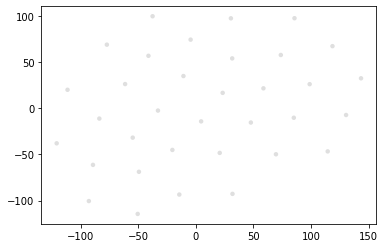

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1).fit(target_similarity_matrix)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
projection = TSNE().fit_transform(target_similarity_matrix)
plt.scatter(*projection.T, s=20, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
clusterer = hdbscan.HDBSCAN().fit(target_similarity_matrix.T)
clusterer

HDBSCAN()

In [ ]:
labels= clusterer.labels_
labels

array([-1, 83, -1, ..., -1, -1, -1])

In [ ]:


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 475
Estimated number of noise points: 15256


In [ ]:
clusterer.labels_.max()

474

In [ ]:
for unique_label in set(labels):

    class_member_mask = (labels == unique_label)
    print("In cluster", unique_label, "found", Counter(class_member_mask)[True], "points")
    print("Samples")
    print(np.array(target_texts)[class_member_mask])
    print("-------------------------------------")

Streaming output truncated to the last 5000 lines.
 'that makes sense do you have any dogs']
-------------------------------------
In cluster 11 found 14 points
Samples
['same here and have a good one' 'same here and have a good one'
 'same here and have a good one' 'same here and have a good one'
 'he loved spiderman do you have many albums'
 'same here and have a great one' 'same here and have a good one'
 'same here and have a good one' 'same here and have a great one'
 'same here and have a good one' 'same here and have a great one'
 'same here and have a great one' 'same here and have a great one'
 'same here and have a good one']
-------------------------------------
In cluster 12 found 8 points
Samples
['yes it is well thanks for the chat' 'well thanks for the chat'
 'well thanks for the chat' 'well thanks for the chat'
 'all that for the low low price of 2795' 'well thanks for the chat'
 'well thanks for the chat' 'well thanks for the chat']
------------------------------------

In [ ]:
with open('target_hdbscan_auto.pickle', 'wb') as handle:
    pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)